<a href="https://colab.research.google.com/github/shashankbhatia15/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Copy_of_Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YES BANK STOCK CLOSING PRICE PREDICTION**

**Given Problem Statement**

---


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the
news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting
to see how that impacted the stock prices of the company and whether Time series models
or any other predictive models can do justice to such situations. This dataset has monthly
stock prices of the bank since its inception and includes closing, starting, highest, and lowest
stock prices of every month. The main objective is to predict the stock’s closing price of the
month.

**Data Science Problem Statement**

---

Perform regression analysis using multiple model to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.


In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from xgboost import XGBRegressor
from sklearn import neighbors
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECTS/YES BANK STOCK CLOSING PRICE PREDICTION - SHASHANK BHATIA/data_YesBank_StockPrices.csv')

# **DATA OVERVIEW**

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.shape

(185, 5)

# **DATA INFORMATION**


---
We have 185 rows and 4 columns in our dataset with no null values.Here our dependent variable will be *Close*, and independent variables are - *Open, High  and Low*.

* **Date:**  It denotes the month and year of the investment made.
* **Open:**  Open means the price at which a stock started trading that month.
* **High:**  refers to the maximum price that month.
* **Low:**   refers to the minimum price that month.
* **Close:** refers to the final trading price for that month, which we have to predict using regression techniques.

In [ ]:
#copying data to preserve orignal file
df1= df.copy()

# **EDA AND Data Pre-Processing**

BIFURCATE DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
indep_var=df1[['High','Low','Open']]
dep_var=df1['Close']

**HANDLING DATE**

In [ ]:
# converting 'Date' into datetime - YYYY-MM-DD
from datetime import datetime
df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [ ]:
#set date as index
df1.set_index('Date',inplace=True)

In [ ]:
#check if changes are being reflected
df1.head(1)

,Open,High,Low,Close
Date,,,,
2005-07-01,13.0,14.0,11.25,12.46


**CHECK AND HANDLE DUPLICATES**

In [ ]:
#check duplicate entries
len(df1[df1.duplicated()])

0

No duplicates in the data found

**UNIVARIATE ANALYSIS**
---
we will take a look at distribution plots of our features.


INDEPENDANT VARIABLES



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

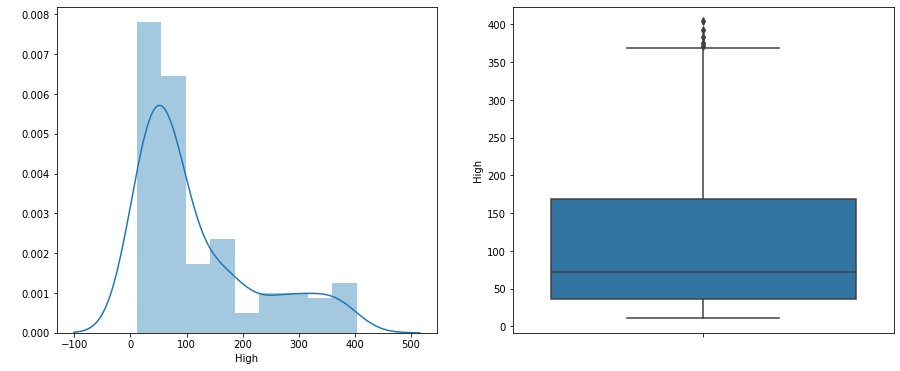

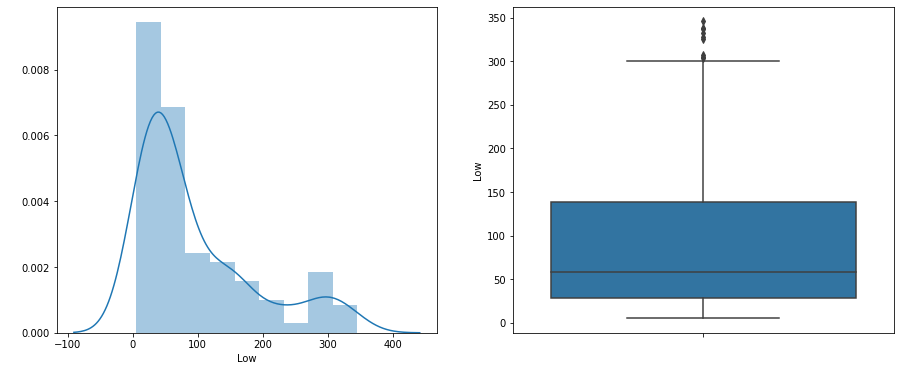

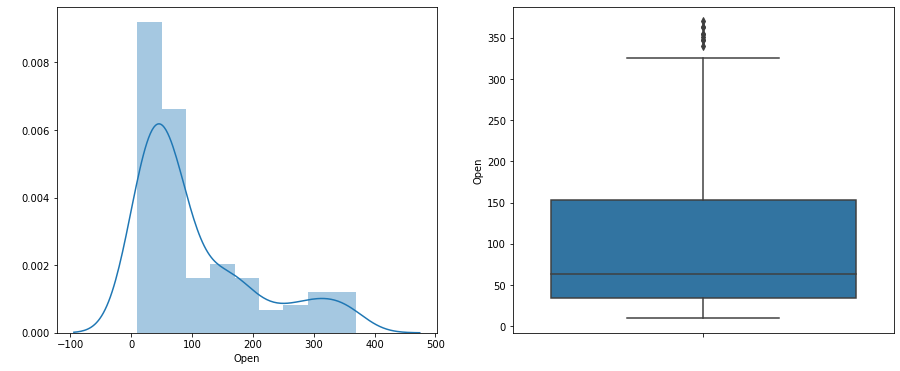

In [ ]:
#plots for independent variables
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(df1[var].dropna())
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=df1[var])
    fig.set_title('')
    fig.set_ylabel(var)


DEPENDANT VARIABLE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Open')

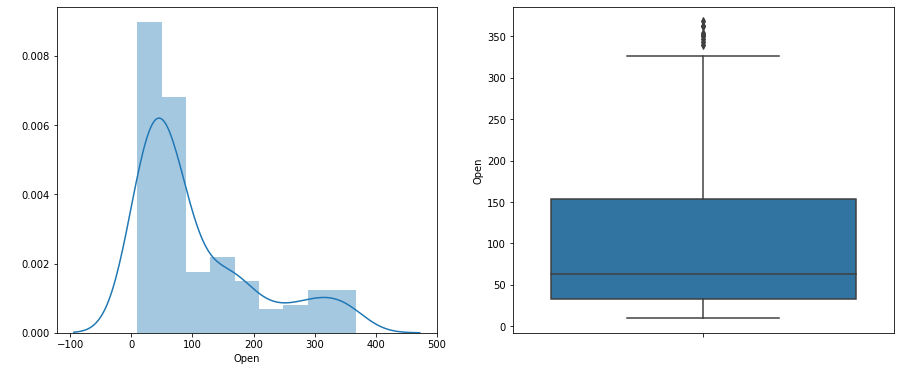

In [ ]:
#plots for dependent variable
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sns.distplot(df1['Close'].dropna())
fig.set_ylabel(' ')
fig.set_xlabel(var)

plt.subplot(1, 2, 2)
fig = sns.boxplot(y=df1['Close'])
fig.set_title('')
fig.set_ylabel(var)

LOG TRANSFORMATION

---
Since our data is skewed, we will perform some transformation during regression analysis. let's visualize how our data will look like post transformation.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

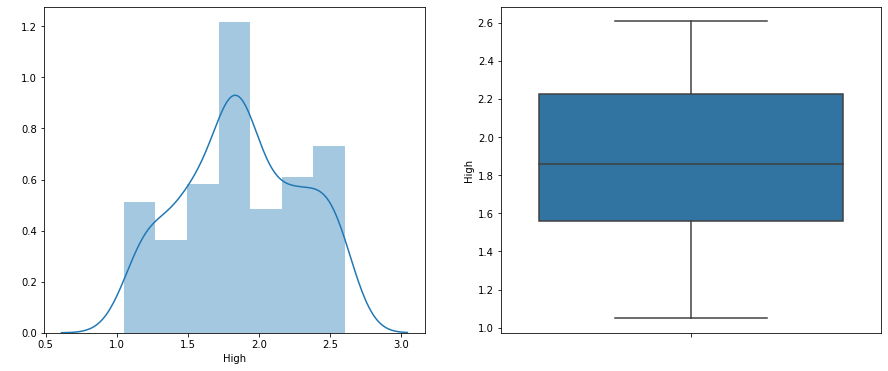

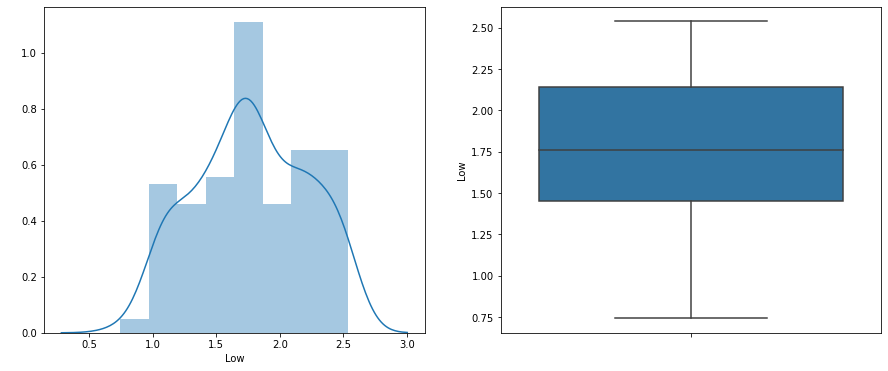

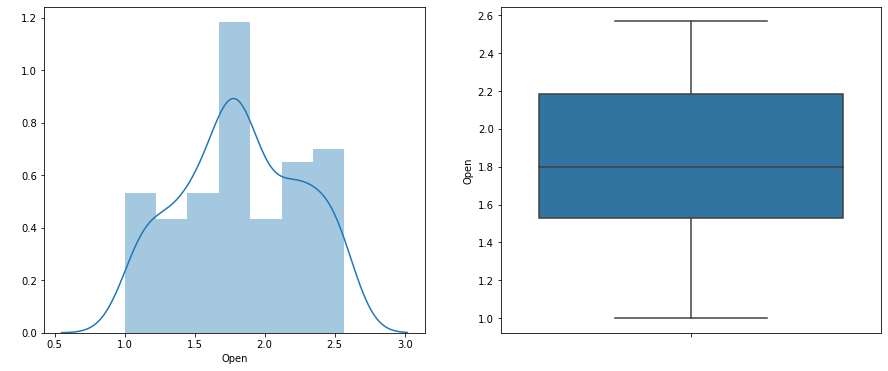

In [ ]:
#independent variable
for var in indep_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(np.log10(df1[var]))
    fig.set_ylabel(' ')
    fig.set_xlabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=np.log10(df1[var]))
    fig.set_title('')
    fig.set_ylabel(var)

Now our data mimics normal distribution to an extent.

**BIVARIATE ANALYSIS**

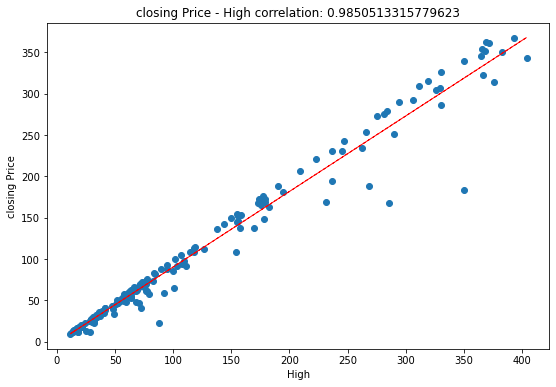

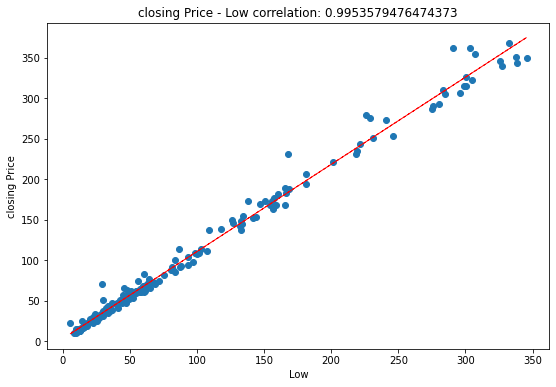

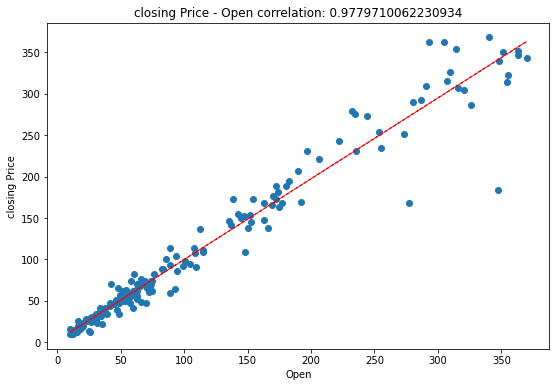

In [ ]:
#scatter plot between dependent variable with all independent variables.
for col in indep_var:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df1[col]
   label = df1['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('closing Price')
   ax.set_title('closing Price - ' + col + ' correlation: ' + str(correlation))
   z = np.polyfit(df1[col], df1['Close'], 1)
   y_hat = np.poly1d(z)(df1[col])
 
   plt.plot(df1[col], y_hat, "r--", lw=1)
 
plt.show()

We can clearly see that all the independent variables are lineraly affecting our dependent variable.

**CORRELATION**

Now, we will see the correlation between all the features in our data set.

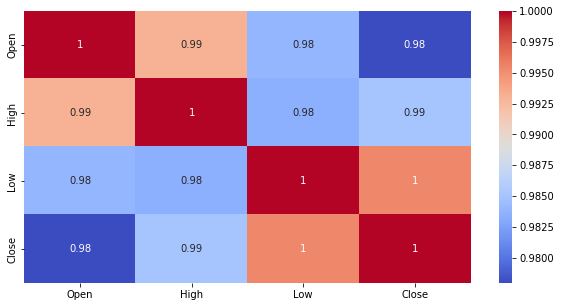

In [ ]:
#correlation plot
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot = True, cmap='coolwarm')
plt.show()

**MULTICOLLINEARITY**

In [ ]:
#Multicollinearity
#VIF score

def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(indep_var)

,variables,VIF
0,High,167.057523
1,Low,71.574137
2,Open,175.185704


NOTE - Even though I have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predicts future values.


---
I tried to run an analysis  by converting high and low into day range and my error increased by 3x-4x, which further proved all data points here are necessary.


***DATAFRAME TO STORE EVALUATION METRICS ***

I will store the evaluation metrics for each regression model into this data frame to compare at the end.

In [ ]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

# **LINEAR REGRESSION**

From this point we will run different Regression models in the same data.

---

Let's  start with Linear Regression.

In [ ]:
df2=indep_var.copy()
df2['range']= df2['High']-df2['Low']
df2=df2.drop(labels=['High','Low'],axis=1)
df2.head(1)

,Open,range
0,13.0,2.75


In [ ]:
#train test data split
x_train, x_test,y_train, y_test = train_test_split(df2,dep_var,test_size=.20,random_state=1)

In [ ]:
#data transformation
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Fitting Linear Regression to the Training set
reg = LR()
reg = LR().fit(x_train, y_train)

In [ ]:
#predictions
y_pred = reg.predict(x_test)

**EVALUATION**

In [ ]:
#evaluation metrics
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 9.680085250447572
MSE : 193.20103082124368
RMSE : 13.899677363926246
0.9791344878855583
Adjusted R2 :  0.977907104820003


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Linear regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i+=1

**VISUALIZATION**

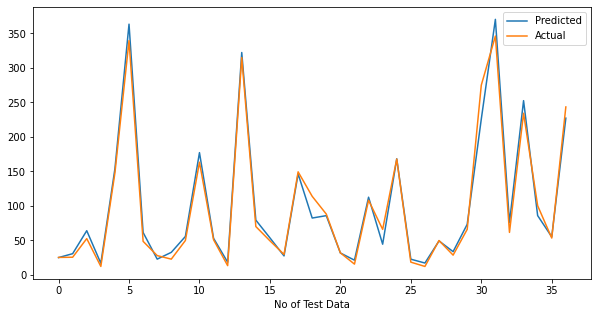

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **LASSO REGRESSION**

In [ ]:
#fitting data
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(x_train, y_train)

0.960662434972429

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15220.591101219317, tolerance: 120.28204414923727
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18486.303964542232, tolerance: 120.47512755152542
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19647.16330742146, tolerance: 120.31191676474577
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9114.91

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -424.17715208692607


In [ ]:
#prediction
y_pred = lasso_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 9.680085250447556
MSE : 193.20103082124297
RMSE : 13.899677363926221
0.9791344878855585
Adjusted R2 :  0.9779071048200031


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Lasso regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

**VISUALIZATION**

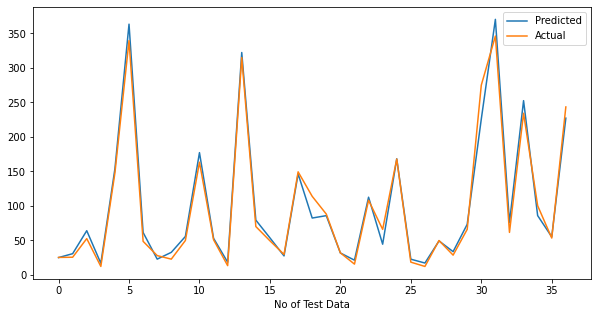

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **RIDGE**

In [ ]:
#fitting data
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(x_train, y_train)

0.9603592827463487

In [ ]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -556.1997594236631


In [ ]:
#Prediction
y_pred = ridge_regressor.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 9.68008525044757
MSE : 193.20103082124345
RMSE : 13.899677363926237
0.9791344878855585
Adjusted R2 :  0.9779071048200031


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='Ridge regression'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

**VISUALIZATION**

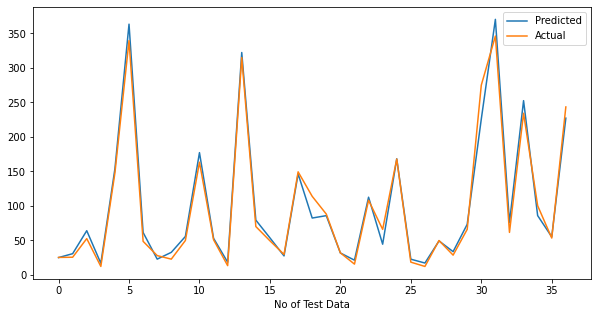

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **KNN**

In [ ]:
#hyperparameter tuning
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)

In [ ]:
#fitting data
model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#prediction
y_pred=model.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 7.99243243243243
MSE : 175.14543378378372
RMSE : 13.234252294095942
0.9810844737480415
Adjusted R2 :  0.9799717957332205


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='KNN - MINMAX'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

**VISUALIZATION**

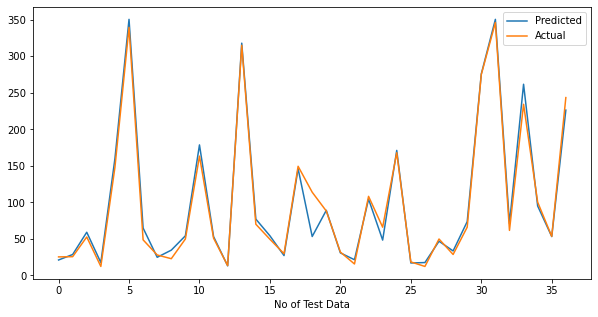

In [ ]:
#actual-predicted values plot
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **XGBOOST REGRESSOR**

Since Xgboost is a black box technique and has alot of inbuilt functions, we will put un transformed data through it.

In [ ]:
#data split
#x_train, x_test,y_train, y_test = train_test_split((indep_var),(dep_var),test_size=.20,random_state=1)

In [ ]:
#fitting data
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

[07:06:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
#prediction
y_pred = xgb.predict(x_test)

In [ ]:
#evaluation metrics
MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred))
print(r2)

adj_r2=1-(1-r2_score((y_test), (y_pred)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print("Adjusted R2 : ",adj_r2)

MAE : 8.483474699484336
MSE : 152.92238988633457
RMSE : 12.366179276006578
0.9834845395742483
Adjusted R2 :  0.9825130419021453


In [ ]:
#Inserting errors in dataframe
error_df.loc[i,"Model_Name"]='XGBoost regressor min max'
error_df.loc[i,"MAE"]=round(MAE,2)
error_df.loc[i,"MSE"]=round(MSE,2)
error_df.loc[i,"RMSE"]=round(RMSE,2)
error_df.loc[i,"r2 score"]=round(r2,6)
error_df.loc[i,"adjusted r2 "]=round(adj_r2,6)

i=i+1

**VISUALIZATION**

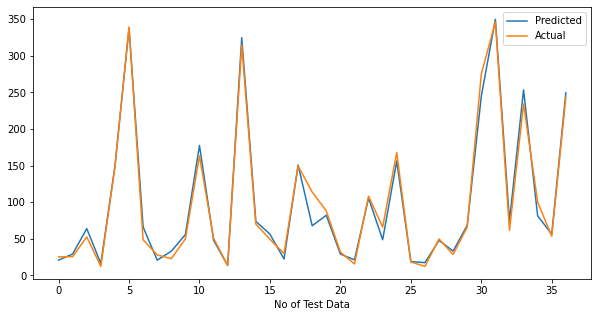

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **METRICS COMPARISION**

In [ ]:
error_df

,Model_Name,MAE,MSE,RMSE,r2 score,adjusted r2
0,Linear regression,9.68,193.20,13.90,0.979134,0.977907
1,Lasso regression,9.68,193.20,13.90,0.979134,0.977907
2,Ridge regression,9.68,193.20,13.90,0.979134,0.977907
3,KNN - MINMAX,7.99,175.15,13.23,0.981084,0.979972
4,XGBoost regressor min max,8.48,152.92,12.37,0.983485,0.982513
